In [2]:
import pandas as pd
import numpy as np
%pylab inline

numpy.ufunc has the wrong size, try recompiling


ValueError: numpy.ufunc has the wrong size, try recompiling

In [6]:
#populating the interactive namespace from numpy and matplotlab

In [3]:
# we are going to use the iris dataset which is already in sklearn

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['species']=[iris.target_names[x] for x in iris.target]

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# you dont have to put it in a dataframe, you could jusr call it like this

In [14]:
print 'Independant variables: \n%s' % iris.feature_names

Independant variables: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print 'Class labels: \n%s' % iris.target_names

Class labels: 
['setosa' 'versicolor' 'virginica']


# Classification using KNN

In [16]:
from matplotlib.colors import ListedColormap

In [17]:
from sklearn import neighbors, datasets, feature_selection

In [18]:
# define the variables to start modelling
n_neighbours = range(1,51,2)

# We need random numbers, but we want to be able to provide reproductibility
np.random.seed(123)



In [40]:
# Load the data
X = iris.data
Y = iris.target

In [41]:
# we would like to create our training set (which is 70% of total)
n = int(len(Y)* 0.7)

In [42]:
# stack arrays in sequence horixontally with hstack, and lebel

ind = np.hstack((np.ones(n, dtype=np.bool), np.zeros(len(y)-n, dtype=np.bool)))

In [43]:
#now randomise
np.random.shuffle(ind)
ind

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,

In [44]:
# we can create our training and testing set
X_train, X_test = X[ind], X[ind==False]
Y_train, Y_test = Y[ind], Y[ind==False]

In [45]:
# now let us do the magic
score = []
for k in n_neighbours:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, Y_train)
    score.append(clf.score(X_test, Y_test))

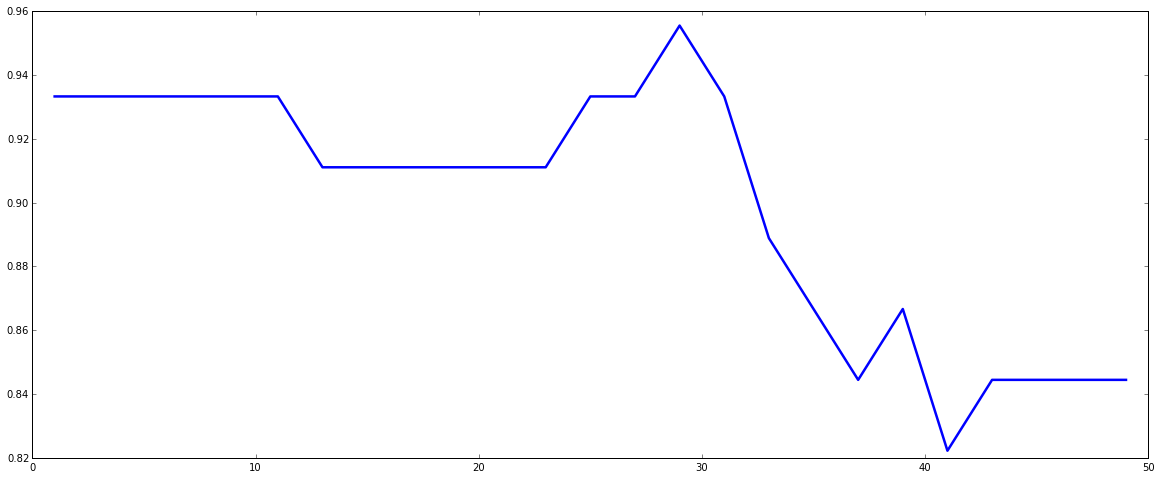

In [46]:
# let us look at it
figure(figsize= (20, 8))
plot(n_neighbours, score, linewidth=2.5)

In [63]:
scores = []
for k in range(5):
    np.random.shuffle(ind)
    X_train, X_test = X[ind], X[ind==False]
    Y_train, Y_test = Y[ind], Y[ind==False]
    clf = neighbors.KNeighborsClassifier(21, weights='uniform')
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))
    
print scores
print np.mean(scores)

[0.93333333333333335, 0.97777777777777775, 0.9555555555555556, 0.9555555555555556, 0.93333333333333335]
0.951111111111


In [68]:
# To showcase our whole models performance, we can plot our algorithm against the two most significant 
# features available in this dataset

In [71]:
# below returns the highest significants for features 2 and 3
# remember python uses index 0
feature_selection.f_classif(x,y)
h = .02 # step size in the mesh

In [79]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [80]:
clf = neighbors.KNeighborsClassifier(21, weights='uniform')
clf.fit(x[:, 2:4], y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=21, p=2, weights='uniform')

In [81]:
#plot the decision boundary, for that we will apply a color to each
#plot the mesh [x_min, m_max]x[y_min, y_max].

In [82]:
x_min, x_max = x[:,2].min() - 1, x[:,2].max() + 1
y_min, y_max = x[:,3].min() - 1, x[:,3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result in a color plot
Z = Z.reshape(xx.shape)



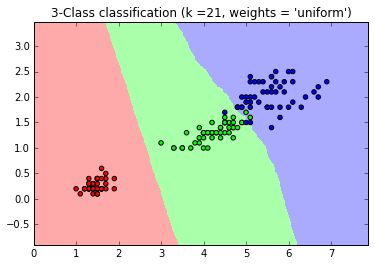

In [83]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#also plot the training points
plt.scatter(x[:, 2], x[:, 3], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k =%i, weights = '%s')" % (21, 'uniform'))
plt.show()